In [1]:
import pandas as pd
import numpy as np
import yfinance as yahooFinance
import matplotlib.pyplot as plt
import requests

In [2]:
stock = input ("Please Enter the Stock ticker: ") 
stock_ticker=stock
stock_ticker+=".NS"
Get_Stock_Information = yahooFinance.Ticker(f"{stock_ticker}")
df=pd.DataFrame(Get_Stock_Information.history(period="max"))


Please Enter the Stock ticker: hdfcbank


In [3]:
df.tail(20)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-04-10 00:00:00+05:30,1529.020586,1529.020586,1512.298855,1515.653076,13903700,0.0,0.0
2024-04-12 00:00:00+05:30,1500.509858,1509.240612,1493.061520,1498.487427,20542104,0.0,0.0
2024-04-15 00:00:00+05:30,1477.375789,1489.658021,1471.949883,1474.564087,11707624,0.0,0.0
2024-04-16 00:00:00+05:30,1466.967953,1492.519066,1462.281942,1488.918213,10372443,0.0,0.0
2024-04-18 00:00:00+05:30,1489.460763,1498.388774,1470.963354,1474.564087,17117442,0.0,0.0
2024-04-19 00:00:00+05:30,1466.523992,1514.271875,1460.308814,1510.671143,17288217,0.0,0.0
2024-04-22 00:00:00+05:30,1536.419530,1536.419530,1487.981004,1491.828369,21149219,0.0,0.0
2024-04-23 00:00:00+05:30,1505.738561,1505.935819,1482.999030,1487.290405,13413530,0.0,0.0
2024-04-24 00:00:00+05:30,1494.590675,1501.249743,1488.720879,1491.335083,11220790,0.0,0.0


In [4]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')

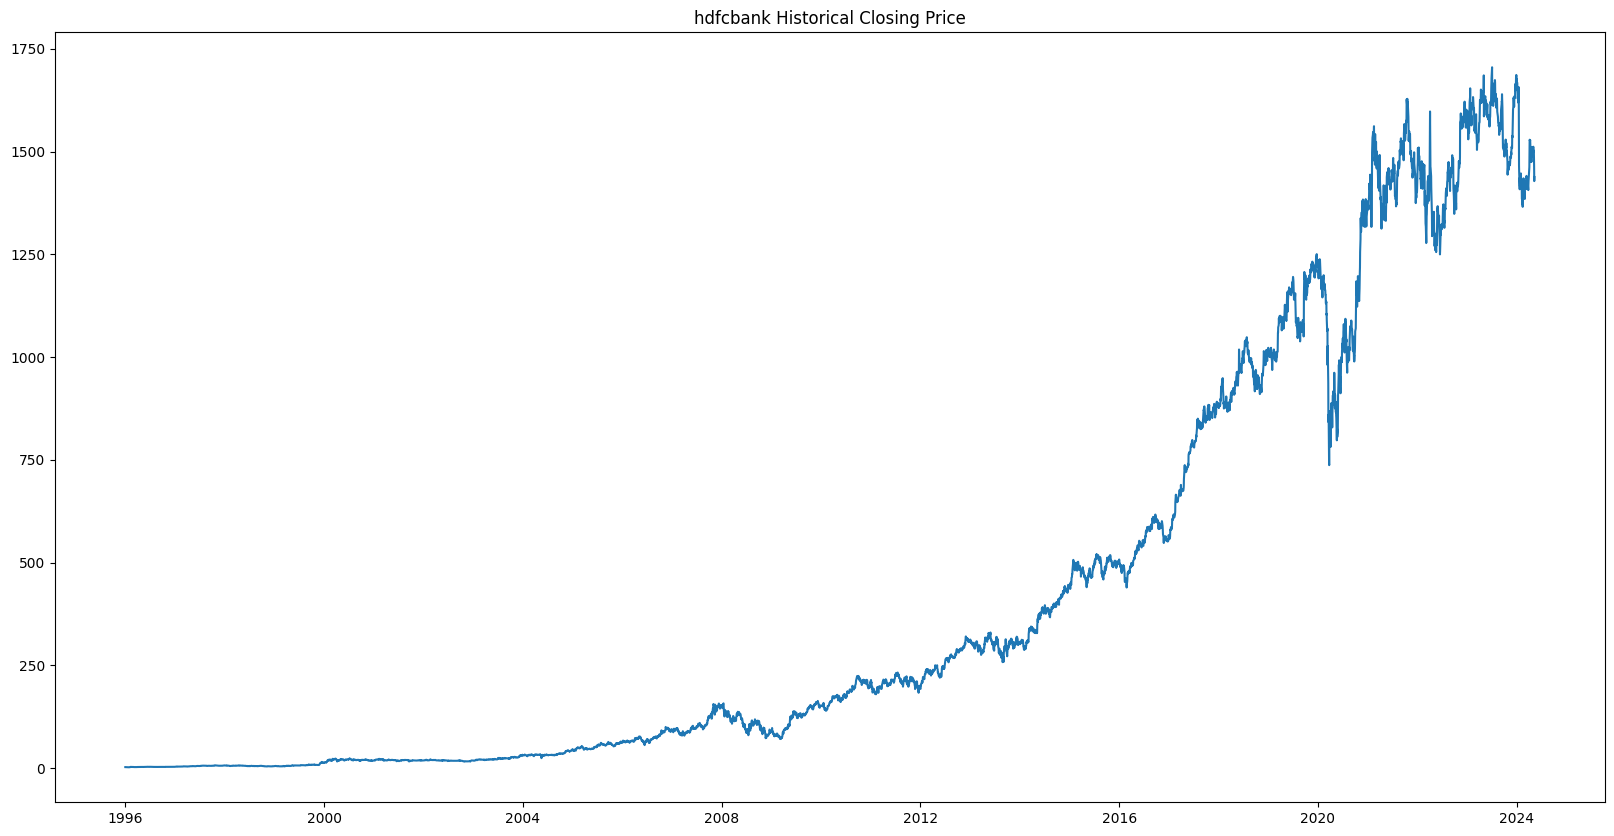

In [5]:
plt.figure(figsize = (20,10)) 
#plt.title('Opening Prices from {} to {}'.format(start_date, 
                                                #end_date)) 
plt.title(f"{stock}" " Historical Closing Price")
plt.plot(df['Close']) 
plt.show()

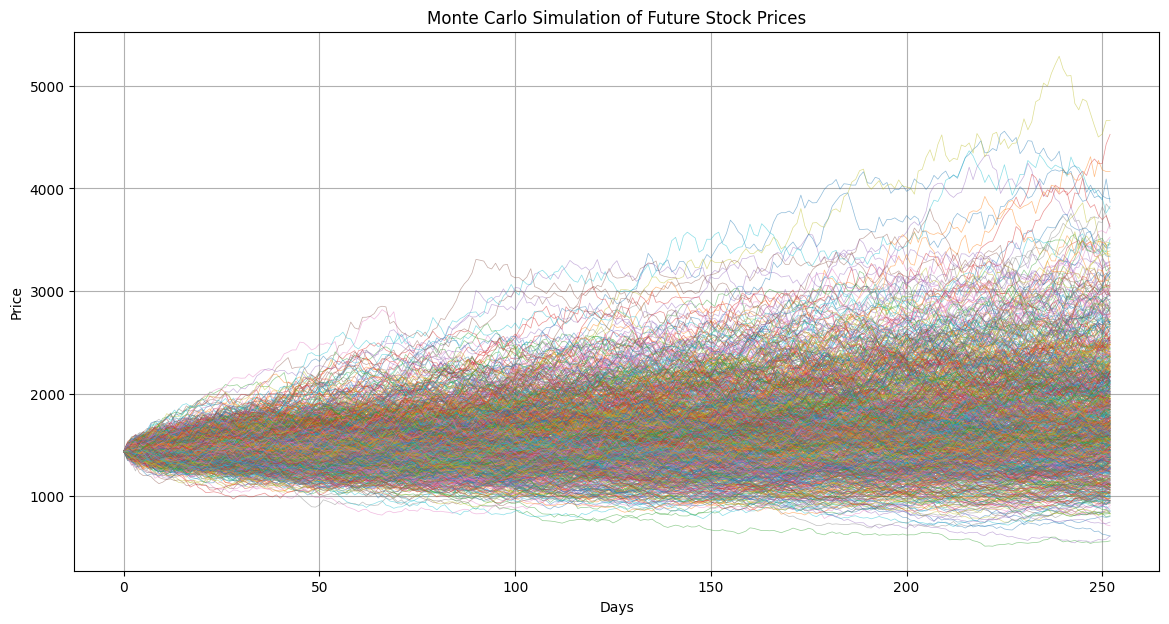

In [6]:
log_returns = np.log(df['Close'] / df['Close'].shift(1)).dropna()

# Monte Carlo simulation parameters
mu = log_returns.mean()  # Mean of historical log returns
sigma = log_returns.std()  # Standard deviation of historical log returns
S0 = df['Close'].iloc[-1]  # Starting stock price, the last available close price
days = 252  # Number of days to forecast
simulations = 1000  # Number of simulation paths

# Initialize the array to store the simulation results
paths = np.zeros((days + 1, simulations))
paths[0] = S0  # Set the initial price

# Generate the Monte Carlo paths
for t in range(1, days + 1):
    Z = np.random.normal(0, 1, simulations)  # Draw random samples from a standard normal distribution
    paths[t] = paths[t-1] * np.exp((mu - 0.5 * sigma**2) + sigma * Z)

# Plotting the simulation results
plt.figure(figsize=(14, 7))
for i in range(simulations):
    plt.plot(paths[:, i], linewidth=0.5, alpha=0.5)
plt.title('Monte Carlo Simulation of Future Stock Prices')
plt.xlabel('Days')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [7]:
log_returns = np.log(df['Close'] / df['Close'].shift(1)).dropna()

# Parameters for the simulation
mu = log_returns.mean()  # Mean of historical log returns
sigma = log_returns.std()  # Standard deviation of historical log returns
S0 = df['Close'].iloc[-1]  # Last observed price

# Define periods in trading days (approximations: 252 days/year)
periods = {'6 months': 126, '1 year': 252, '3 years': 756}
returns = [0.10, 0.25, 0.50]
simulations = 10000

# Results dictionary
results = {period: {ret: 0 for ret in returns} for period in periods}

# Running Monte Carlo simulations
np.random.seed(42)  # For reproducibility
for period_name, days in periods.items():
    paths = np.zeros((days + 1, simulations))
    paths[0] = S0
    for t in range(1, days + 1):
        Z = np.random.normal(0, 1, simulations)
        paths[t] = paths[t-1] * np.exp((mu - 0.5 * sigma**2) + sigma * Z)
    
    final_prices = paths[-1]
    for ret in returns:
        target_price = S0 * (1 + ret)
        count = np.sum(final_prices >= target_price)
        probability = count / simulations
        results[period_name][ret] = probability

# Print the results
for period in results:
    print(f"Probabilities for {period}:")
    for ret in results[period]:
        print(f"  {ret*100}% return: {results[period][ret]*100:.2f}%")
    print()

Probabilities for 6 months:
  10.0% return: 48.11%
  25.0% return: 27.88%
  50.0% return: 8.21%

Probabilities for 1 year:
  10.0% return: 60.13%
  25.0% return: 44.34%
  50.0% return: 23.80%

Probabilities for 3 years:
  10.0% return: 76.81%
  25.0% return: 69.22%
  50.0% return: 57.48%

